In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import seed
from random import random

In [3]:
def p(r1,r2,zef):
    return np.exp(-2*zef*(r1+r2))

j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
j= 11
j= 12
j= 13
j= 14
j= 15
j= 16
j= 17
j= 18
j= 19
j= 20
j= 21
j= 22
j= 23
j= 24
j= 25
j= 26
j= 27
j= 28
j= 29
j= 30
j= 31
j= 32
j= 33
j= 34
j= 35
j= 36
j= 37
j= 38
j= 39
EV= [-4.71550962 -4.82950561 -4.9657151  -4.9821102  -5.0895017  -5.16649552
 -5.21643164 -5.30546252 -5.37783224 -5.40626026 -5.46287165 -5.50872419
 -5.55065081 -5.59245322 -5.59709395 -5.64202943 -5.63671595 -5.6645916
 -5.70990322 -5.67073091 -5.71079128 -5.7124827  -5.68407553 -5.66159922
 -5.65780551 -5.61744027 -5.56082346 -5.55957008 -5.49456549 -5.49830412
 -5.39760882 -5.40326003 -5.31392657 -5.2438678  -5.21150591 -5.12009318
 -5.05051945 -4.99445895 -4.96516416 -4.87505045]


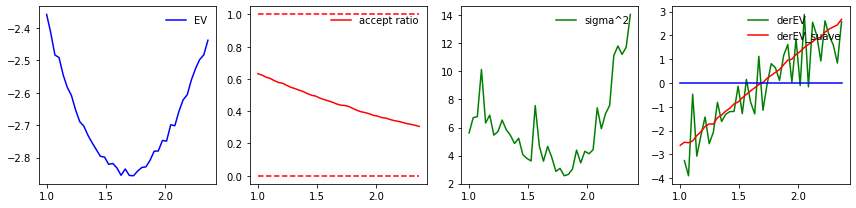

In [5]:
M=40 # numero de valores de zef que usaremos
N=100000 # numero de posiciones que generaremos para los 2 electrones (6 variables)
zef_max=2.4 # valores limites de beta
zef_min=1.
deltazef=(zef_max-zef_min)/M # paso en beta
uno = np.empty(M)
cero = np.empty(M)
EV = np.empty(M) # arreglo de valores de la energia variacional para los distintos zef
mean_derlog = np.empty(M)
mean_derlogEL = np.empty(M)
derEV = np.empty(M-1)
sigma2 = np.empty(M) # arreglo de varianzas en la energia variacional
z= np.empty(M) # arreglo de zs
z_1= np.empty(M-1)
percentage = np.empty(M) # para ver razon de aceptación en la generacion de los x's. Pare elegir bien el pasito. 
x1 = np.empty(N) 
y1 = np.empty(N) 
z1 = np.empty(N)
x1d = np.empty(N) 
y1d = np.empty(N) 
z1d = np.empty(N)
x2 = np.empty(N) 
y2 = np.empty(N) 
z2 = np.empty(N)
x2d = np.empty(N) 
y2d = np.empty(N) 
z2d = np.empty(N)
EL = np.empty(N) # energias locales para cada x
derlog = np.empty(N)
derlogEL = np.empty(N)
percentages = np.empty(N-1) # tasa de aceptacion "local" (es decir hasta cierto x)
x1[0] = 1.
y1[0] = 1.1
z1[0] = .9
x2[0] = -1.
y2[0] = -1.1
z2[0] = -.9
step = 0.35#1.6#3.2
seed(1)
uno[:]=1
cero[:]=0
for j in range(M):
    zef = zef_min + deltazef*j 
    Naccept=0
    Nreject=0
#    Aca partimos la cadena para un beta dado 
    for i in range (N-1):
        
        c_x1 = x1[i]
        x1d[i] = np.random.normal(loc=0.0, scale=step, size=None)
        p_x1 = c_x1 + x1d[i]
        c_y1 = y1[i]
        y1d[i] = np.random.normal(loc=0.0, scale=step, size=None)
        p_y1 = c_y1 + y1d[i]
        c_z1 = z1[i]
        z1d[i] = np.random.normal(loc=0.0, scale=step, size=None)
        p_z1 = c_z1 + z1d[i]
        
        c_x2 = x2[i]
        x2d[i] = np.random.normal(loc=0.0, scale=step, size=None)
        p_x2 = c_x2 + x2d[i]
        c_y2 = y2[i]
        y2d[i] = np.random.normal(loc=0.0, scale=step, size=None)
        p_y2 = c_y2 + y2d[i]
        c_z2 = z2[i]
        z2d[i] = np.random.normal(loc=0.0, scale=step, size=None)
        p_z2 = c_z2 + z2d[i]
        
        c_r1 = np.sqrt(c_x1**2 + c_y1**2 + c_z1**2)
        c_r2 = np.sqrt(c_x2**2 + c_y2**2 + c_z2**2)
        c_r12 = np.sqrt((c_x1-c_x2)**2+(c_y1-c_y2)**2+(c_z1-c_z2)**2)
        
        p_r1 = np.sqrt(p_x1**2+p_y1**2+p_z1**2)
        p_r2 = np.sqrt(p_x2**2+p_y2**2+p_z2**2)
        p_r12 = np.sqrt((p_x1-p_x2)**2+(p_y1-p_y2)**2+(p_z1-p_z2)**2)
        
        EL[i] = (2*zef-4)/c_r1 + (2*zef-4)/c_r2 - 2*zef**2 + 2/c_r12
        derlog[i] = -(c_r1+c_r2)
        derlogEL[i] = derlog[i]*EL[i]
        
        A = p(p_r1,p_r2,zef)/p(c_r1,c_r2,zef)
        if A >= 1:
            x1[i+1] = p_x1
            y1[i+1] = p_y1
            z1[i+1] = p_z1
            x2[i+1] = p_x2
            y2[i+1] = p_y2
            z2[i+1] = p_z2
            Naccept = Naccept+1
        else:
            rand = random()
            if rand < A:
                x1[i+1] = p_x1
                y1[i+1] = p_y1
                z1[i+1] = p_z1
                x2[i+1] = p_x2
                y2[i+1] = p_y2
                z2[i+1] = p_z2
                Naccept = Naccept+1
            else:
                x1[i+1] = c_x1
                y1[i+1] = c_y1
                z1[i+1] = c_z1
                x2[i+1] = c_x2
                y2[i+1] = c_y2
                z2[i+1] = c_z2
                Nreject = Nreject+1
        percentages[i] = Naccept/(Naccept+Nreject)         
    percentage[j] = percentages[N-2]
    z[j] = zef
    EV[j] = np.mean(EL)
    mean_derlog[j] = np.mean(derlog)
    mean_derlogEL[j]  = np.mean(derlogEL)
    
    if j > 0:
        derEV[j-1] = (EV[j]-EV[j-1])/deltazef
        z_1[j-1] = z[j]
    sigma2[j] = np.mean((EL-EV[j])**2)*(N/(N-1))
    print('j=',j)
#print(EV)
plt.figure(figsize=(12,3))
plt.subplot(1,4,1)
plt.plot(z,EV*.5,color='blue', label='EV')
plt.legend(loc='upper right', frameon=False)
#plt.ylim(0,3)
plt.tight_layout()
plt.subplot(1,4,2)
plt.plot(z,percentage,color='red', label='accept ratio')
plt.plot(z,uno,color='red', linestyle='dashed')
plt.plot(z,cero,color='red', linestyle='dashed')
plt.legend(loc='upper right', frameon=False)
plt.tight_layout()
plt.subplot(1,4,3)
plt.plot(z,sigma2,color='green', label='sigma^2')
plt.legend(loc='upper right', frameon=False)
plt.tight_layout()
plt.subplot(1,4,4)
plt.plot(z_1,derEV,color='green', label='derEV')
plt.plot(z,2*(mean_derlogEL-mean_derlog*EV),color='red', label='derEV_suave')
plt.plot(z,cero,color='blue')
plt.legend(loc='upper right', frameon=False)
plt.tight_layout()

print('EV=',EV)

In [37]:
print('min de EV=', np.mean(EV)*13.6, 'eV')
print('comparado con -79.005 eV experimental')

min de EV= -72.97358732602095 eV
comparado con -79.005 eV experimental
